In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
import torch as th

In [ ]:
from stable_baselines3.ppo.policies import MlpPolicy

In [ ]:
%load_ext autoreload
%autoreload 2
from environment import *
import tensorflow as tf
import tqdm
import pandas as pd
import random

In [ ]:
data1 = np.array(pd.read_csv("dataset1"))
data2 = np.array(pd.read_csv("dataset2"))
data3 = np.array(pd.read_csv("dataset3"))
data4 = np.array(pd.read_csv("dataset4"))
data5 = np.array(pd.read_csv("dataset5"))
data6 = np.array(pd.read_csv("dataset6"))
data7 = np.array(pd.read_csv("dataset7"))
data8 = np.array(pd.read_csv("dataset8"))

In [ ]:
from stable_baselines3.common.env_checker import check_env

In [ ]:
env = train_env(np.array([data1,data2,data3,data4,data5,data6,data7,data8]),max_steps=50000,punish = -15,reward_correct = 1,punish_other = -10)

hi
50000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
check_env(env, warn=True)

In [ ]:

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


In [ ]:
import os
log_dir = "/log/RBF"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

In [ ]:
model =   PPO('MlpPolicy', env,verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [ ]:
callback = SaveOnBestTrainingRewardCallback(check_freq=50000, log_dir=log_dir)
model.learn(total_timesteps=9000000, log_interval=200, callback=callback)

Num timesteps: 50000
Best mean reward: -inf - Last mean reward per episode: 8568.52
Saving new best model to /log/IOE_combine4/RBF/best_model.zip
Num timesteps: 100000
Best mean reward: 8568.52 - Last mean reward per episode: 8625.39
Saving new best model to /log/IOE_combine4/RBF/best_model.zip
Num timesteps: 150000
Best mean reward: 8625.39 - Last mean reward per episode: 8630.59
Saving new best model to /log/IOE_combine4/RBF/best_model.zip
Num timesteps: 200000
Best mean reward: 8630.59 - Last mean reward per episode: 8659.30
Saving new best model to /log/IOE_combine4/RBF/best_model.zip
Num timesteps: 250000
Best mean reward: 8659.30 - Last mean reward per episode: 8708.97
Saving new best model to /log/IOE_combine4/RBF/best_model.zip
Num timesteps: 300000
Best mean reward: 8708.97 - Last mean reward per episode: 8722.50
Saving new best model to /log/IOE_combine4/RBF/best_model.zip
Num timesteps: 350000
Best mean reward: 8722.50 - Last mean reward per episode: 8765.33
Saving new best 

In [ ]:
env.number_of_calls

183

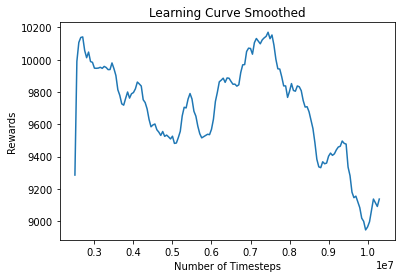

In [ ]:
plot_results(log_dir)

In [ ]:
model.save("models/saved_model")